In [15]:
from qm1.grid import *
from qm1.operators import *
from qm1.qmsystem import *  

# set up a grid (with vanishing boundary conditions)
grid = UniformGrid(boundary_condition="vanishing", xmin=-15., xmax=15., num=150)

# set time domain/view
tgrid=np.linspace(0., 50., 500)

# define potentials to use
stat_pot = BarrierPot(xstart=8., xstop=+10., vstep=-10.)
# td_pot = DipolTDPot(omega=2*np.pi / tgrid[-1]*10, k=2*2*np.pi/(grid.points[-1]-grid.points[0]), amplitude=1.)
td_pot = GrowingBarrierTDPot(xstart=-10., xstop=-2., vstep=-10., tstart=10., tstop=30.)

# set the quantum mechanical system
qsys = QMSystem(grid=grid, stat_pot=stat_pot, td_pot=td_pot, mass=1.)

In [16]:
from qm1.operators import *

# hamilton operator
op_hamilton = HamiltonOp(qsys)

# define the ground state hamiltonian to be the one at time t=0
op_hamilton_gs = op_hamilton.eval(t=tgrid[0])

# return the rhs of the schrödinger equation, when lhs is only the time derivative, rhs = i hbar H
op_evolution = op_hamilton * (-1j)

# show the operators
if False:
  op_full_pot = OperatorTD(qsys.grid, qsys.full_pot)
  anim_full_pot = op_full_pot.show(tgrid=tgrid, file='tdmwe_op_full_potential.mp4')
  anim_hamiltonian = op_hamilton.show(tgrid=tgrid, file='tdmwe_op_hamilton.gif')

In [17]:
from IPython.display import HTML, display
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 200  # MB
# Display the animation in the jupyter notebook
try: HTML(anim_full_pot.to_jshtml())
except: pass
try: HTML(anim_hamiltonian.to_jshtml())
except: pass

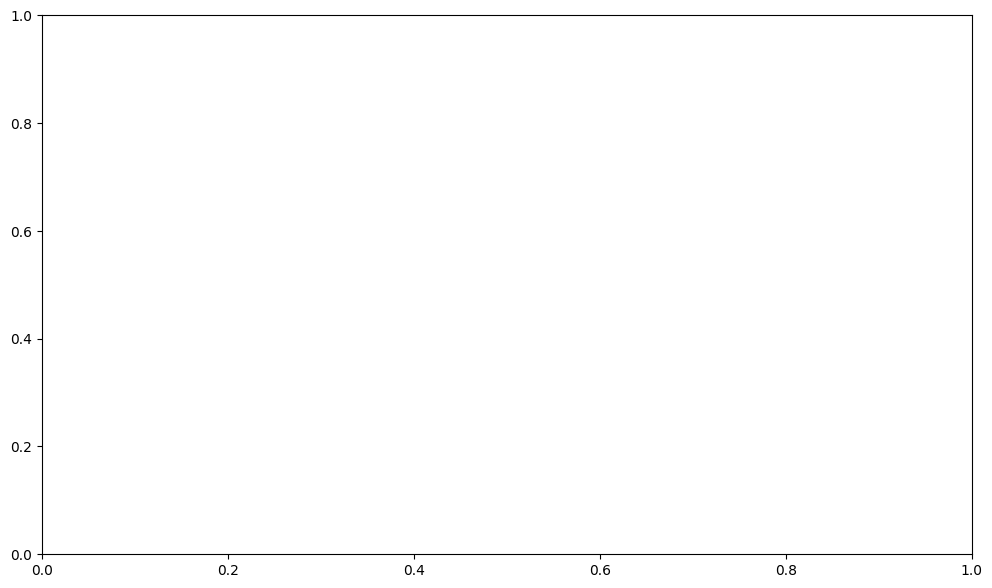

In [18]:
from qm1.wavefunction import GaussianWavePackage
from qm1.eigensystem import Eigensystem

if True:
  # either choose a eigenstate as initial wf
  eigsys = Eigensystem(num=5, operator=op_hamilton_gs)
  init_wf = eigsys.eigstates[-1] + (1j)*eigsys.eigstates[-2]
else:
  # or any other wave func
  init_wf = GaussianWavePackage(qsys.grid, mu=4, sigma=10, k=.1)

init_wf.show(file='tdmwe_init_wavefunc.png', absphase=True)


In [19]:
tdwf = init_wf.evolve(tgrid, op_evolution)

In [20]:
%load_ext autoreload
%autoreload 2
ani = tdwf.show(tgrid=tgrid, pot=qsys.full_pot, file='tdmwe_wavefunc.gif')
if False: display(HTML(ani.to_jshtml()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from qm1.measurement import Measure
from qm1.eigensystem import Eigensystem
final_wf = tdwf.wflist[-1]
op_position = PositionOp(qsys.grid)
m = Measure(op=PositionOp(qsys.grid), num_states=100)
m.eigsys.show(file="tdmwe_eigensystem.png")
m(init_wf, num_obs=1000)
m.show('tdmwe_measure_init_wf.png')
m(final_wf, num_obs=1000)
m.show(file='tdmwe_measure_final_wf.png')

/home/ak/code/qm1/qm1/eigensystem.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  coefficients[_i] = wavefunc.scalar_prod(self.eigstates[_i])
